In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

## <span style="color:royalblue"> Google Data Analytics Course - Case Study 2 </span>
# <span style="color:royalblue"> How Can a Wellness Technology Company Play It Smart? </span> 

[Bellabeat](https://bellabeat.com/) is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

The case study will focus on analyzing smart device data to gain insight into how consumers are using their smart devices. This knowledge will then help the Bellabeat app in providing better tips for improving users' health and satisfaction with the connected wellness products. 

# <span style="color:royalblue"> Table of Contents </span>

* [1. Ask Phase](#ask_phase_1)
    * [1.1 Business Task](#business_task_1_1)
* [2. Prepare Phase](#prepare_phase_2)
    * [2.1 Dataset used](#dataset_used_2_1)
    * [2.2 Data credibility and integrity](#data_credibility_and_integrity_2_2)
* [3. Process Phase](#process_phase_3)
    * [3.1 Installing packages and opening libraries](#installing_packages_and_opening_libraries_3_1)
    * [3.2 Importing datasets](#importing_datasets_3_2)
    * [3.3 Inspecting and Cleaning datasets](#cleaning_datasets_3_3)
* [4. Analyze and Share Phase](#analyze_phase_4)
    * [4.1 Usage and Activity overview](#usage_4_1)
    * [4.2 Sleep classification](#sleep_4_2)
    * [4.3 Sleep and Activity patterns](#sleep_4_3)
* [5. Conclusion and Act Phase](#act_phase_5)
    
    
# <span style="color:royalblue">  1. Ask Phase </span>  <a class="anchor" id="ask_phase_1"></a>

### 1.1 Business Task <a class="anchor" id="business_task_1_1"></a> 

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy. 
Three key questions:
1. **What are some trends in smart device usage?**
2. **How could these trends apply to Bellabeat customers?**
3. **How could these trends help influence Bellabeat marketing strategy?**

Stakeholders 

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer 
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team 
* Bellabeat Marketing Analytics team 

# <span style="color:royalblue"> 2. Prepare Phase </span> <a class="anchor" id="prepare_phase_2"></a> 

#### 2.1 Dataset used: <a class="anchor" id="dataset_used_2_1"></a> 

The data source used for our case study is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit?select=Fitabase+Data+4.12.16-5.12.16).

These datasets are open source and can be can copied, modified and distributed even for commercial purposes.
There are 18 CSV files each contaning specific quantitative data tracked by the Fitbit smart device and collected via Amazon Mechanical Turk between 03.12.2016-05.12.2016.

The data is mostly organized in a long format with an ID number for each of the 30 users who partecipated in the study and date time.

#### 2.2 Data Credibility and Integrity:<a class="anchor" id="data_credibility_and_integrity_2_2"></a> 

This data might be strongly biased and not representative of the population due to the small size (30 users) and lack of demographic information which is not ideal since Bellabeat is a company with a focus on women's health only. Furthermore, all datasets were collected in a relatively short period of time (2 months) thus leaving out any seasonal trend. For these reasons the present case study is to be considered only as a first operational approach to answer the above buisness task. 

# <span style="color:royalblue">  3. Process Phase </span> <a class="anchor" id="process_phase_3"></a> 

### 3.1 Installing packages and opening libraries <a class="anchor" id="installing_packages_and_opening_libraries_3_1"></a> 

We will choose the packages that will help us on our analysis and open them. 
We will use the following packages for our analysis: 

* tidyverse
* lubridate
* dplyr
* ggplot2
* tidyr
* here
* skimr
* janitor
  




In [2]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(here)
library(skimr)
library(janitor)
install.packages("ggpubr") 
library(ggpubr)
library(ggrepel) 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’




### 3.2 Importing datasets <a class="anchor" id="importing_datasets_3_2"></a> 

The following are the datasets used for this analysis

- daily_activity: Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories 
- daily_sleep: Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed
- hourly_steps: Hourly Steps over 31 days of 33 users
- hourly_kcal: Hourly Calories burned over 31 days of 33 users




In [3]:
daily_activity <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_kcal <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_inten <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

### 3.3 Inspecting and Cleaning datasets <a class="anchor" id="cleaning_datasets_3_3"></a> 


In [4]:
# Previewing datasets
head(daily_activity)
str(daily_activity)

head(daily_sleep)
str(daily_sleep)

head(hourly_steps)
str(hourly_steps)

head(hourly_kcal)
str(hourly_kcal)

head(hourly_inten)
str(hourly_inten)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


In [5]:
# Verifying number of users
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(hourly_steps$Id)
n_unique(hourly_kcal$Id)
n_unique(hourly_inten$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

**there are 9 less participants for sleep data**

In [6]:
# Removing duplicates and N/A
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()
hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()
hourly_kcal <- hourly_kcal %>%
  distinct() %>%
  drop_na()
hourly_inten <- hourly_inten %>%
  distinct() %>%
  drop_na()

In [7]:
# Ensuring right syntax and same format for all columns in all data sets
clean_names(daily_activity);
daily_activity<- rename_with(daily_activity, tolower);
clean_names(daily_sleep);
daily_sleep <- rename_with(daily_sleep, tolower);
clean_names(hourly_steps);
hourly_steps <- rename_with(hourly_steps, tolower);
clean_names(hourly_kcal);
hourly_kcal <- rename_with(hourly_kcal, tolower);
clean_names(hourly_inten);
hourly_inten <- rename_with(hourly_inten, tolower);

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,step_total
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


id,activity_hour,calories
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48
1503960366,4/12/2016 6:00:00 AM,48
1503960366,4/12/2016 7:00:00 AM,47
1503960366,4/12/2016 8:00:00 AM,68


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


In [8]:
# Cleaning date-time format for daily_activity and daily_sleep
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))
daily_sleep <- daily_sleep %>%
  rename(date = sleepday) %>%
  mutate(date = as_date(date, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
# check cleaned data
head(daily_activity)
head(daily_sleep)

Warning message:
“`tz` argument is ignored by `as_date()`”


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


In [9]:
# Cleaning date-time format for daily_activity and daily_sleep for our hourly data sets
hourly_steps<- hourly_steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 
hourly_kcal<- hourly_kcal %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 
hourly_inten<- hourly_inten %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 

#### Merging and summarizing of data

In [10]:
# Merging daily_activity and daily_sleep using id and date as their primary keys.
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

In [11]:
# Calculating the average and coefficient of variation subject-wise
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), 
             mean_daily_sleep = mean(totalminutesasleep), sd_daily_sleep = sd(totalminutesasleep),
             cv_daily_sleep = sd(totalminutesasleep)/mean(totalminutesasleep)*100,
             mean_daily_inbed = mean(totaltimeinbed)) # CV (coeff. of variation) = Standard Deviation / Mean ----> to compare variation between subjects

head(daily_average)

# why one NA sd?
daily_activity_sleep %>%
  filter(id == 2320127002) %>%
  head()

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,sd_daily_sleep,cv_daily_sleep,mean_daily_inbed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800,100.47700,27.888585,383.2000
1644430081,7967.750,2977.750,294.0000,334.75264,113.861444,346.0000
1844505072,3477.000,1676.333,652.0000,66.36264,10.178319,961.0000
1927972279,1490.000,2316.200,417.0000,219.23503,52.574349,437.8000
2026352035,5618.679,1540.786,506.1786,42.26552,8.349923,537.6429
2320127002,5079.000,1804.000,61.0000,NA,NA,69.0000


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2320127002,2016-04-23,5079,3.42,3.42,0,0,0,3.42,0,0,0,242,1129,1804,1,61,69


**Subject 2320127002 has a NA for the variability measures since he only has one day of recorded activity**

# <span style="color:royalblue">  4. Analyze and Share Phase </span> <a class="anchor" id="analyze_phase_4"></a> 

### 4.1 Usage and Activity overview <a class="anchor" id="usage_4_1"></a> 


In [12]:
# Percentage of use (number of days)
daily_use <- daily_activity %>%
  group_by(id) %>%
  summarize(days_used=sum(n()))  
daily_use %>%
  count(days_used) %>% 
  mutate(perc = n / nrow(daily_use)) %>% 
  arrange(days_used)

days_used,n,perc
<int>,<int>,<dbl>
4,1,0.03030303
18,1,0.03030303
19,1,0.03030303
20,1,0.03030303
26,2,0.06060606
28,1,0.03030303
29,2,0.06060606
30,3,0.09090909
31,21,0.63636364


 The majority of participants (63%) used the device for the whole period (31 days)

In [13]:
Sys.setlocale("LC_TIME","en_US.UTF-8")

minutes_worn <- daily_activity %>% 
  mutate(total_minutes_worn = veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes+sedentaryminutes)%>%
  mutate (percent_minutes_worn = (total_minutes_worn/1440)*100)

weekday_mins_worn <- minutes_worn %>%
  mutate(weekday = weekdays(date))
weekday_mins_worn$weekday <-ordered(weekday_mins_worn$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                      "Friday", "Saturday", "Sunday"))
weekday_mins_worn <-weekday_mins_worn%>%
  group_by(weekday) %>%
  summarize (daily_avg_worn = mean(percent_minutes_worn))
head(weekday_mins_worn)

[1] "en_US.UTF-8"

weekday,daily_avg_worn
<ord>,<dbl>
Monday,87.29919
Tuesday,86.24954
Wednesday,84.25093
Thursday,81.85988
Friday,85.88018
Saturday,83.92697


On average, participants wore the device for more than 80% across all weekdays

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


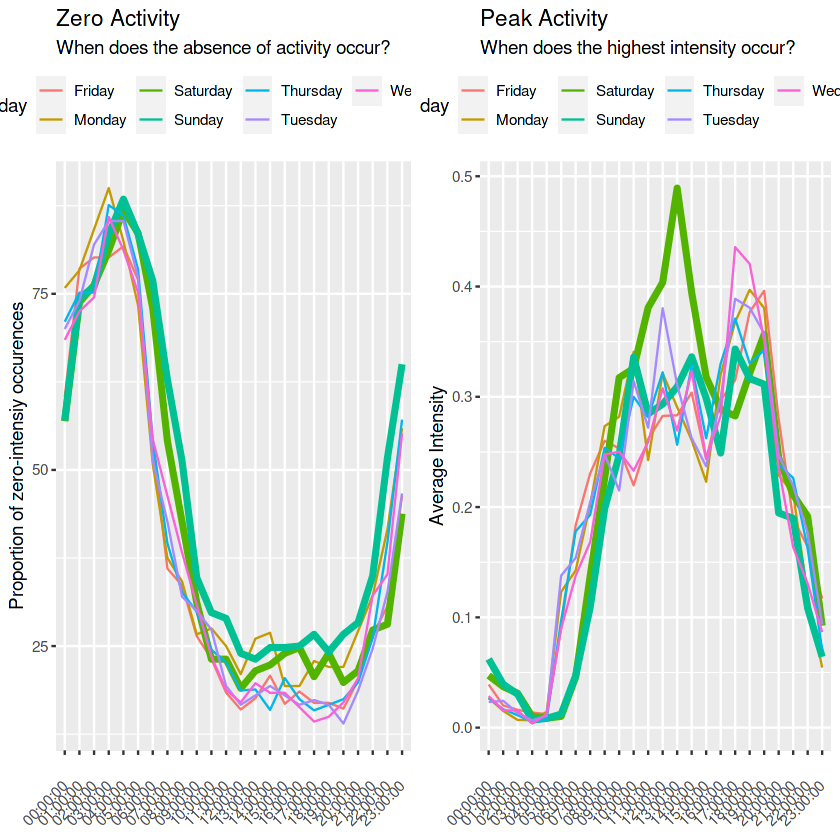

In [14]:
#Percent of ZERO Activity vs HIGHEST Activity during the day
ggarrange(
hourly_inten %>%
  mutate(day = weekdays(date)) %>%
  group_by(day, time) %>%
  summarize(percent_of_zero_inten = 100*sum(totalintensity==0)/n(),)  %>% 
  group_by(time) %>% 
  ggplot(aes(x = time,
             y = percent_of_zero_inten, group = day))+
  geom_line(aes(color = day, size = day)) +
  scale_size_manual(values = c("Sunday" = 1.5,"Saturday" = 1.5,"Friday" = 0.5,"Thursday" = 0.5,"Wednesday" = 0.5,
                               "Tuesday" = 0.5,"Monday" = 0.5))+
  labs(subtitle = "When does the absence of activity occur?",
       title = 'Zero Activity',
       x = '', y = 'Proportion of zero-intensiy occurences')+
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1), legend.position = "top") + guides(size = "none"),

hourly_inten %>%
  mutate(day = weekdays(date)) %>%
  group_by(day, time) %>%
  #filter(sleep_type == "normal sleepers (≥ 7 Hrs)" ) %>%
  #filter(sleep_type == "poor sleepers (< 7 Hrs)" ) %>%
  summarize(avgint = mean(averageintensity))  %>% 
  group_by(time) %>% 
  ggplot(aes(x = time,
             y = avgint, group = day))+
  geom_line(aes(color = day, size = day)) +
  scale_size_manual(values = c("Sunday" = 1.5,"Saturday" = 1.5,"Friday" = 0.5,"Thursday" = 0.5,"Wednesday" = 0.5,
                               "Tuesday" = 0.5,"Monday" = 0.5))+
  labs(subtitle = "When does the highest intensity occur?",
       title = 'Peak Activity',
       x = '', y = 'Average Intensity')+
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1), legend.position = "top") + guides(size = "none")
)



The above graphics show that:
> The average peak intensity occur right after usual working hours

> There is a divergent average peak intensity on Saturday during early afternoon

> The most zero activity occur during the weekends with a notable gap during early morning hours

### 4.2 Sleep classification <a class="anchor" id="sleep_4_2"></a> 


##### Sample sleep distribution:

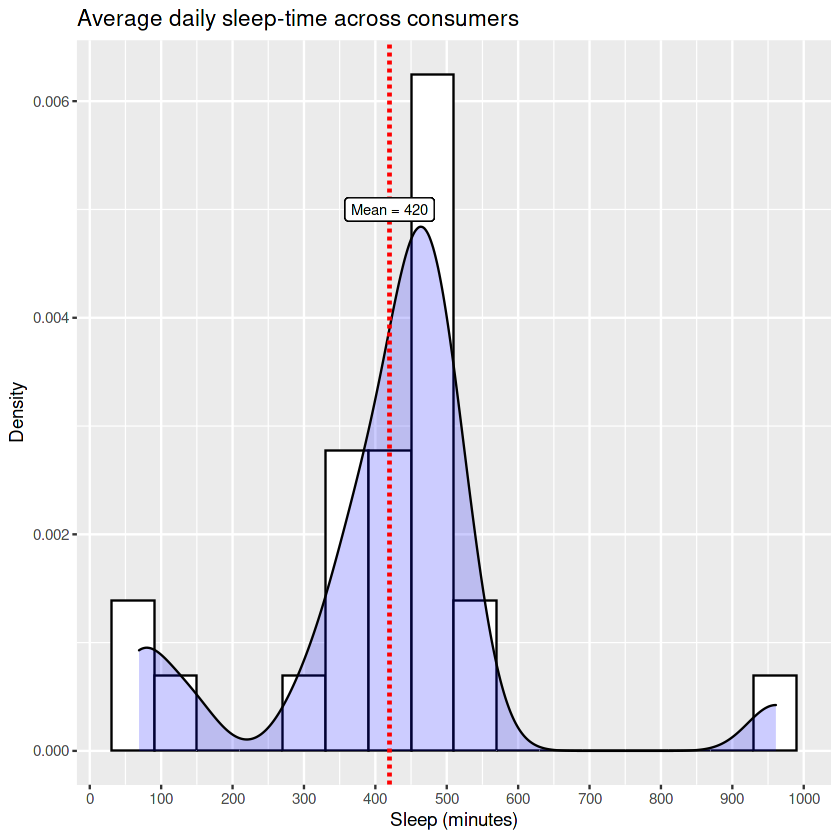

In [15]:
daily_activity_sleep %>% 
  group_by(id) %>% 
  summarize(avg_sleep_time = mean(totaltimeinbed)) %>% 
  ggplot() +
  geom_histogram(mapping = aes(x= avg_sleep_time, y=..density..),
                 binwidth = 60, colour="black", fill="white")+
  geom_density(aes(x= avg_sleep_time),alpha=.2, fill="blue")+
  labs(x = 'Sleep (minutes)', y = 'Density',
       title = 'Average daily sleep-time across consumers')+
  geom_vline(aes(xintercept=mean(avg_sleep_time)),
             color="red", linetype="dashed", size=1)+
  scale_x_continuous(n.breaks = 10)+
  geom_label(aes(x=mean(avg_sleep_time), y= 0.005,
                 label=paste("Mean =",round(mean(avg_sleep_time))) ), size = 3)+
  theme(legend.position = "none")

The average sleep time is 7 hours (420 mins). Based on major health reccomendation we can split the sample into two subgroups:
- Normal sleepers with 7 or more hrs of sleep
- Pool sleepers with less than 7 hrs of sleep

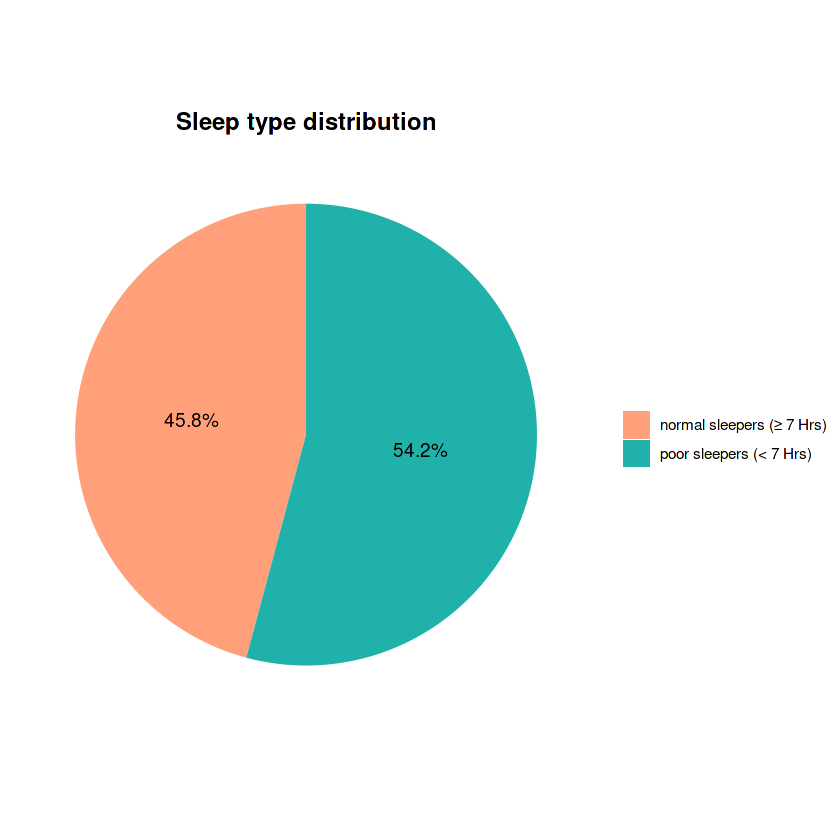

In [16]:
# classify users by the daily average sleep
user_sleep_type <- daily_average %>%
  mutate(sleep_type = case_when(
    mean_daily_sleep < 420 ~ "poor sleepers (< 7 Hrs)",
    mean_daily_sleep >= 420 ~ "normal sleepers (≥ 7 Hrs)"))
# get percentages
user_type_percent <- user_sleep_type %>%
  group_by(sleep_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(sleep_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

# pie chart of sleep subgroups
user_type_percent %>%
  ggplot(aes(x="",y=total_percent, fill=sleep_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold"), legend.title=element_blank()) +
  scale_fill_manual(values = c("lightsalmon", "lightseagreen")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="Sleep type distribution")

### 4.3 Sleep and Activity patterns <a class="anchor" id="sleep_4_3"></a> 



#### Hours of sleep per weekdays

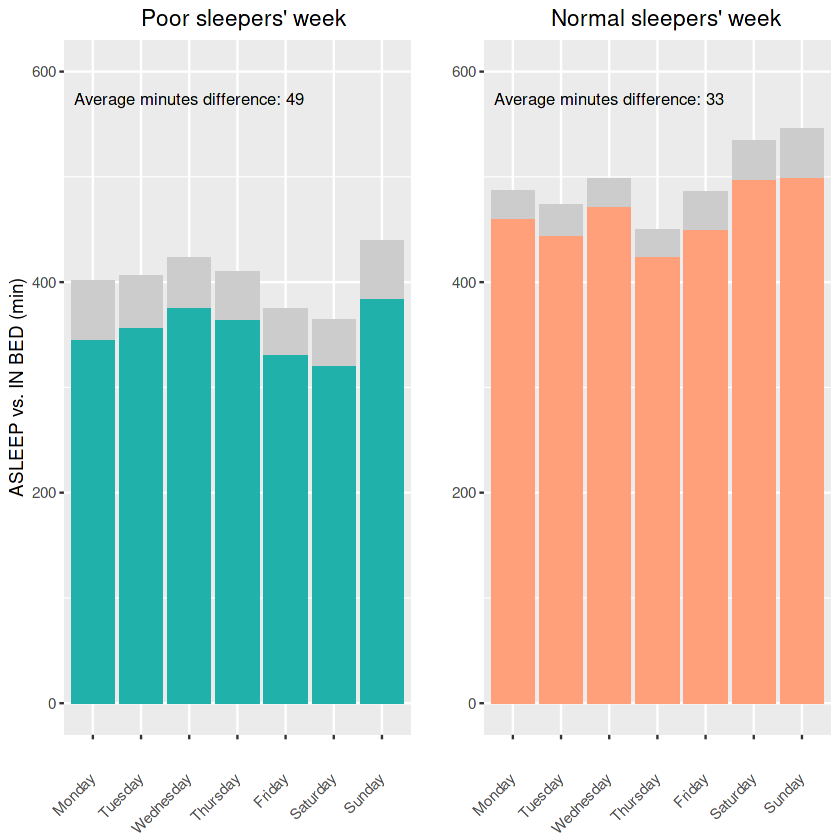

In [17]:
# merge data in long format
daily_data_long <- merge(user_sleep_type, daily_activity_sleep, by=c ("id"))
#glimpse(daily_data_long)

# hours of sleep per weekdays - Use: Sys.setlocale("LC_TIME","en_US.UTF-8")
weekday_steps_sleep <- daily_data_long %>%
  mutate(weekday = weekdays(date))
weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                            "Friday", "Saturday", "Sunday"))
weekday_steps_Psleep <-weekday_steps_sleep%>%
  filter(sleep_type == "poor sleepers (< 7 Hrs)")%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep), daily_bed=mean(totaltimeinbed))

weekday_steps_Nsleep <-weekday_steps_sleep%>%
  filter(sleep_type == "normal sleepers (≥ 7 Hrs)")%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep), daily_bed=mean(totaltimeinbed))

# bar plot sleep weekdays
avg_diff_sleepbed <- round ( mean(weekday_steps_Nsleep$daily_bed) - mean(weekday_steps_Nsleep$daily_sleep))
avg_diff_sleepbed <- c(avg_diff_sleepbed, round ( mean(weekday_steps_Psleep$daily_bed) - mean(weekday_steps_Psleep$daily_sleep)))

ggarrange(
  
  ggplot(weekday_steps_Psleep, aes(weekday, daily_sleep), group = 2) +
    geom_col(aes(weekday, daily_bed, group=1), fill = "grey80") + 
    geom_col(fill = "lightseagreen") +
    #geom_hline(yintercept = 420, linetype="dashed") + 
    scale_y_continuous(limits = c(0, 600)) +
    labs(title = "  Poor sleepers' week", y= "ASLEEP vs. IN BED (min)", x = "") + 
    annotate("text", x = 3, y = 560, label = paste("atop('Average minutes difference: '*",avg_diff_sleepbed[2],")"), parse=T, size= 3.4) +
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1),plot.title = element_text(hjust = 0.5)),
  
  ggplot(weekday_steps_Nsleep, aes(weekday, daily_sleep)) +  
    geom_col(aes(weekday, daily_bed, group=1),fill = "grey80") + 
    geom_col(fill = "lightsalmon") + 
    #geom_hline(yintercept = 420, linetype="dashed") + 
    scale_y_continuous(limits = c(0, 600)) +
    labs(title = "   Normal sleepers' week", x= "", y = "") +
    annotate("text", x = 3, y = 560, label = paste("atop('Average minutes difference: '*",avg_diff_sleepbed[1],")"), parse=T, size= 3.4) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1), legend.position="left",plot.title = element_text(hjust = 0.5))
)


- Poor sleepers seem to decrease their amount of sleep especially on Fridays and Saturdays. 
- Also, on average, poor sleepers spend more time being awake in bed (grey bars) than normal sleepers. 

### Sleep variability

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



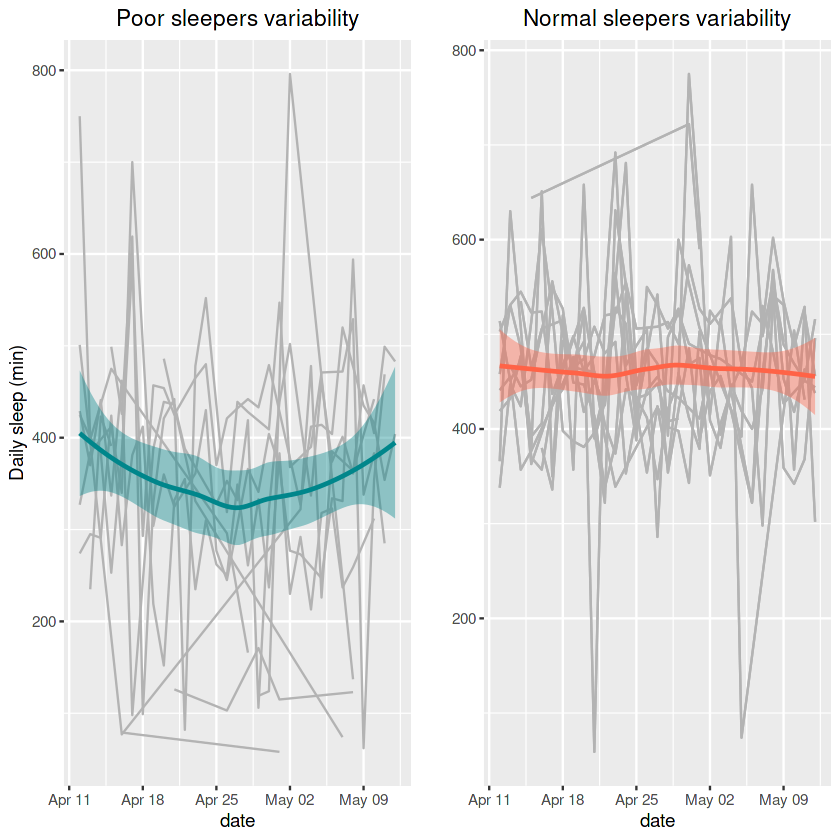

In [18]:
# Amount of sleep over time
daily_data_long <- daily_data_long %>%
  mutate(idchar= as.character(id))%>%
  mutate(zs_sleep = (totalminutesasleep-mean_daily_sleep)/sd_daily_sleep)

ggarrange(
daily_data_long%>%
  filter(sleep_type == "poor sleepers (< 7 Hrs)" )%>%
  ggplot(aes(x = date, y = totalminutesasleep)) + 
  labs(x = "date", y= "Daily sleep (min)", title="Poor sleepers variability") +
  geom_line(aes(group = idchar), color = "grey70")+
  theme(plot.title = element_text(hjust = 0.5))+
  geom_smooth(color = "turquoise4", fill = "turquoise4"),

daily_data_long%>%
  filter(sleep_type == "normal sleepers (≥ 7 Hrs)" )%>%
  ggplot(aes(x = date, y = totalminutesasleep)) + 
  labs(x = "date", y= "", title="Normal sleepers variability") +
  geom_line(aes(group = idchar), color = "grey70") +
  geom_line(aes(group = idchar), color = "grey70") +
  theme(plot.title = element_text(hjust = 0.5))+
  geom_smooth(color = "tomato1", fill = "tomato1") 
)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


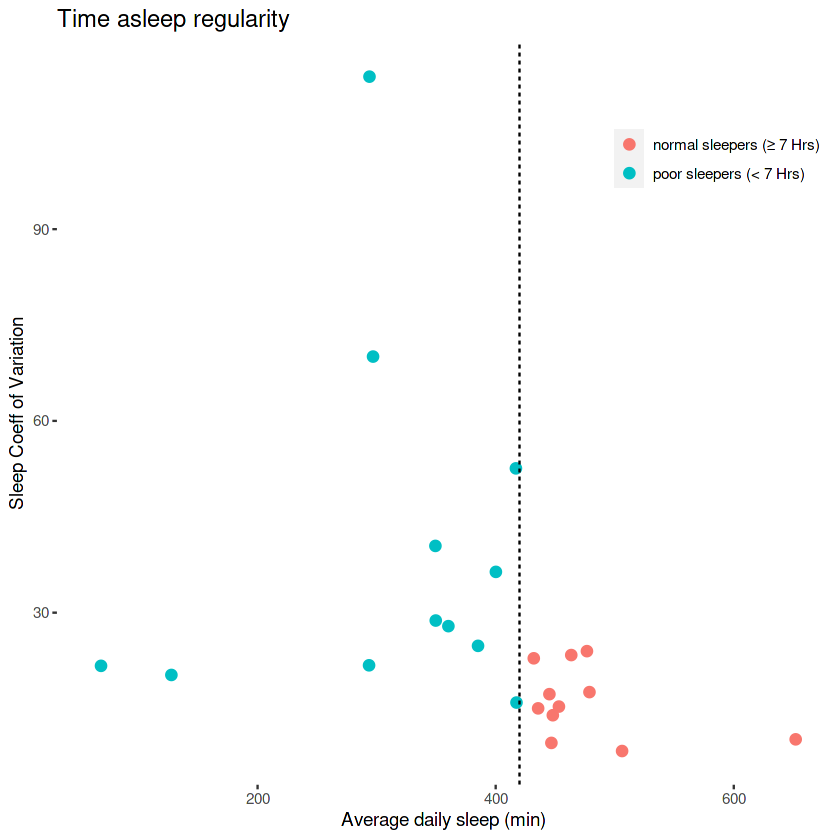

In [19]:
## Coefficient of Variation for each subj VS daily sleep
ggplot(user_sleep_type, aes(x=mean_daily_sleep, y=cv_daily_sleep) )+
  geom_point(aes(color = factor(sleep_type)), size = 2.5) +
  #geom_smooth(method="lm", ) +
  geom_vline(xintercept = 420, linetype = "dashed") +
  labs(x = "Average daily sleep (min)", y= "Sleep Coeff of Variation", title="Time asleep regularity") +
  theme(panel.background = element_blank(),
        plot.title = element_text( size=14), legend.position= c(.85, .85),legend.title=element_blank() )

- Poor sleepers also show an increased variability (coefficient of variation) for their daily amount of sleep

### Hourly activity for Normal and Poor sleepers

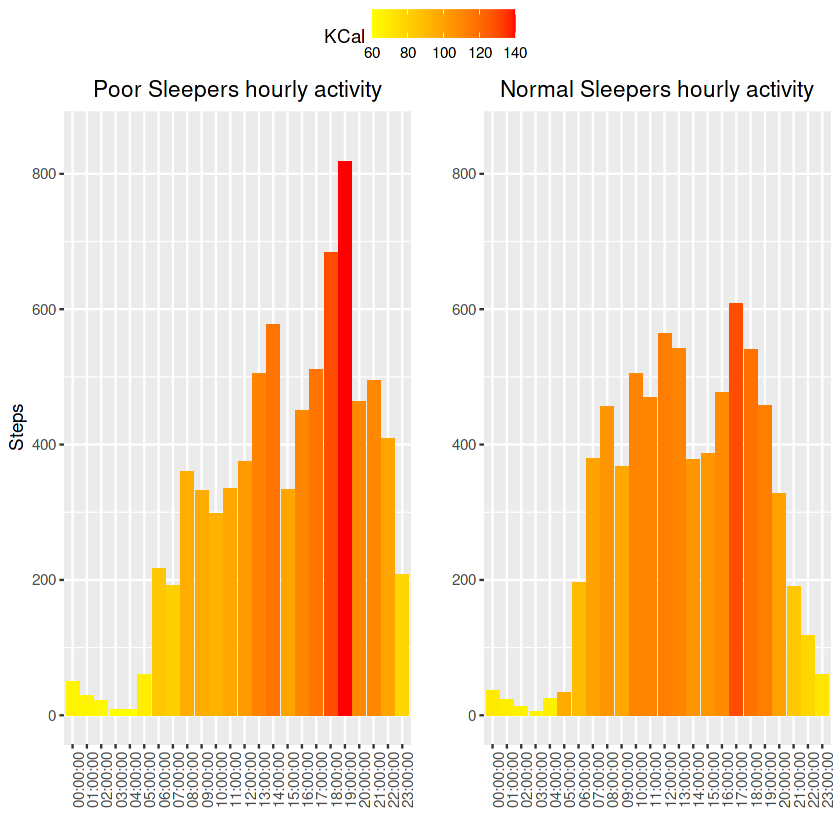

In [20]:
# Merge hourly data with sleep types:

# Kcal
hourly_sleeptype <- merge(  hourly_kcal, user_sleep_type, by=c ("id"))

avg_kcal_sleeptypes <- merge(
  
hourly_avg_kcal <- hourly_sleeptype %>%
  filter(sleep_type == "poor sleepers (< 7 Hrs)")%>%
  group_by(time) %>%
  summarize(average_kcal_PS = mean(calories)),

hourly_avg_kcal <- hourly_sleeptype %>%
  filter(sleep_type == "normal sleepers (≥ 7 Hrs)")%>%
  group_by(time) %>%
  summarize(average_kcal_NS = mean(calories)),

by=c("time"))
# Steps
hourly_sleeptype <- merge(  hourly_steps, user_sleep_type, by=c ("id"))

avg_steps_sleeptypes <- merge(
  
  hourly_avg_kcal <- hourly_sleeptype %>%
    filter(sleep_type == "poor sleepers (< 7 Hrs)")%>%
    group_by(time) %>%
    summarize(average_steps_PS = mean(steptotal)),
  
  hourly_avg_kcal <- hourly_sleeptype %>%
    filter(sleep_type == "normal sleepers (≥ 7 Hrs)")%>%
    group_by(time) %>%
    summarize(average_steps_NS = mean(steptotal)),
  
  by=c("time"))

# Plot
ggarrange(
  
  avg_steps_sleeptypes %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps_PS, fill = avg_kcal_sleeptypes$average_kcal_PS)) + 
  ylim(0, 850) +
  labs(title = "Poor Sleepers hourly activity", x="", y="Steps") + 
  scale_fill_gradient(low = "yellow", high = "red", guide="none" ) +
  theme(axis.text.x = element_text(angle = 90), plot.title = element_text(hjust = 0.5)),

  avg_steps_sleeptypes %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps_NS, fill = avg_kcal_sleeptypes$average_kcal_NS)) + 
  ylim(0, 850) +
  labs(title = "Normal Sleepers hourly activity", x="", y="", fill="KCal") + 
  scale_fill_gradient(low = "yellow", high = "red", limits = c(60,140)) +
  theme(axis.text.x = element_text(angle = 90), legend.position="left", plot.title = element_text(hjust = 0.5)),
  common.legend = TRUE
 )

- Highest amount of kcal is burnt towards late afternoon
- Less activity during the late afternoon might be associated with better sleep

# <span style="color:royalblue">  5. Conclusion and Act Phase </span> <a class="anchor" id="act_phase_5"></a> 



Since sleep is a key aspect of overall health and well-being, the aim was to find specific trends that could help improve the Bellabeat app. 
Stakeholders might consider the following recommendations:

- Sleep consistency: The app could set alarms to go to sleep and wake up at same hours. Also it could set up a recover rountine to follow in case of late night sleep.
- Sleep quality: The app could set sleep hygiene reminders such as going to sleep at same hours and turning off bright lights 1 hour before going to bed 
- Sleep and Activity: The app could learn from sleep habits and acivity routines to advice on which time of day is best to increase activity
